1. Veri Önişleme
Veri setini okuduktan sonra, veri ön işleme adımlarını takip etmelisin. Aşağıda örnek kod parçaları var:

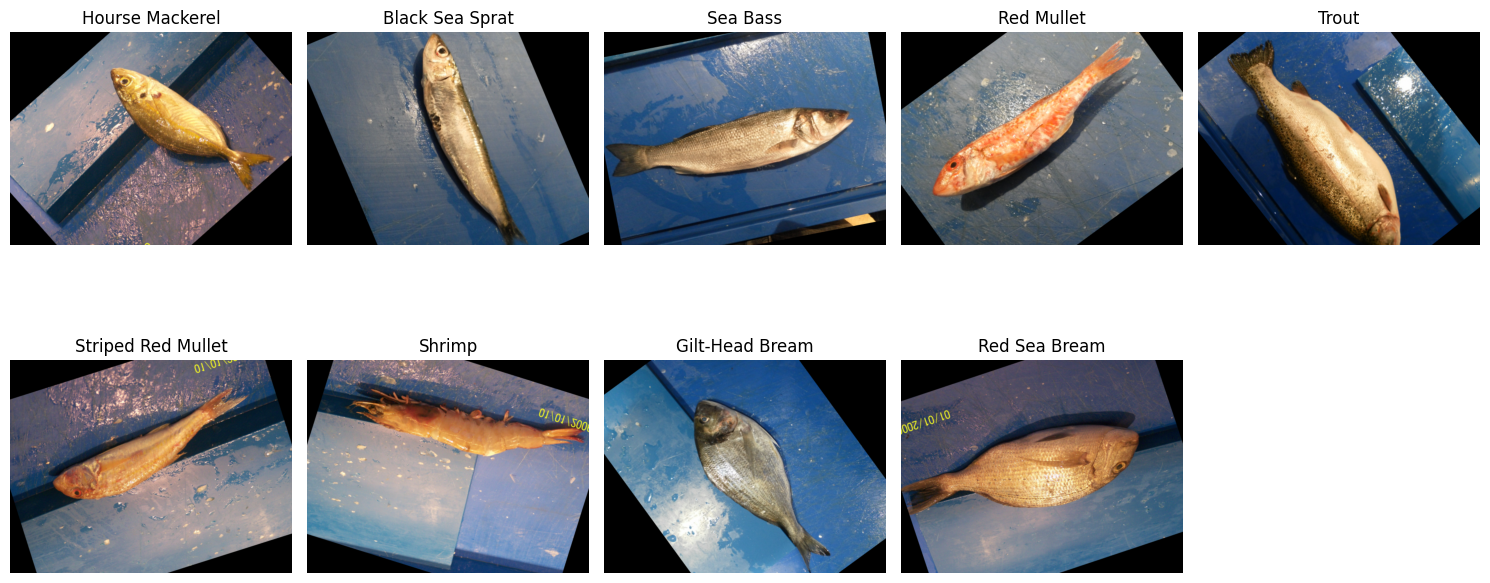

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import random


# Paths and labels
labels = []
image_paths = []
data_directory = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

# Gather image paths and labels
for directory, _, files in os.walk(data_directory):
    for file in files:
        if os.path.splitext(file)[-1] == '.png':
            if directory.split()[-1] != 'GT':
                labels.append(os.path.split(directory)[-1])
                image_paths.append(os.path.join(directory, file))

# Create dataframe for paths and labels
dataset = pd.DataFrame({'path': image_paths, 'label': labels})

# Her etiket için bir örnek görsel göster
unique_labels = dataset['label'].unique()

plt.figure(figsize=(15, 10))

for i, label in enumerate(unique_labels):
    # İlgili etiketin görsellerini al
    label_images = dataset[dataset['label'] == label]['path'].tolist()
    # Rastgele bir görsel seç
    image_path = random.choice(label_images)
    # Görseli yükle
    image = plt.imread(image_path)

    plt.subplot(3, 5, i + 1)  # 3 satır ve 5 sütundan oluşan bir grid
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()


2. Modelin Eğitilmesi

ANN mimarisini kullanarak modelini oluşturabilirsin. Keras kütüphanesi ile modelin eğitimi için bir örnek:

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ImageDataGenerator ile veri artırma
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Veri setini train ve validation olarak ayır
train_generator = datagen.flow_from_dataframe(
    dataframe=dataset,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=dataset,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation'
)

# Modeli oluştur
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(dataset['label'].unique()), activation='softmax'))

# Modeli derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)


Found 7200 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.
Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 117s 496ms/step - accuracy: 0.1358 - loss: 5.1603 - val_accuracy: 0.0000e+00 - val_loss: 2.4127
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 95s 411ms/step - accuracy: 0.1373 - loss: 2.1419 - val_accuracy: 0.0000e+00 - val_loss: 2.6186
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 94s 406ms/step - accuracy: 0.1382 - loss: 2.1117 - val_accuracy: 0.0000e+00 - val_loss: 2.8028
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 94s 409ms/step - accuracy: 0.1390 - loss: 2.0896 - val_accuracy: 0.0000e+00 - val_loss: 2.9673
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 96s 417ms/step - accuracy: 0.1426 - loss: 2.0745 - val_accuracy: 0.0000e+00 - val_loss: 3.1146
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 102s 441ms/step - accuracy: 0.1387 - loss: 2.0638 - val_accuracy: 0.0000e+00 - val_loss: 3.2479
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 99s 429ms/step - accuracy:

4. Modelin Değerlendirilmesi
Modelin başarı metriklerini hesaplamak için:

In [11]:
# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {accuracy:.2f}')


57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 328ms/step - accuracy: 0.0000e+00 - loss: 3.6749
Test Accuracy: 0.00


Eğitim Sürecinin Grafiği
Öncelikle, model eğitimi sırasında kayıp ve doğruluk değerlerini takip edeceğiz ve bu değerleri görselleştireceğiz.

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 99s 429ms/step - accuracy: 0.1458 - loss: 2.0396 - val_accuracy: 0.0000e+00 - val_loss: 3.7571
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 425ms/step - accuracy: 0.1360 - loss: 2.0369 - val_accuracy: 0.0000e+00 - val_loss: 3.8372
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 426ms/step - accuracy: 0.1332 - loss: 2.0332 - val_accuracy: 0.0000e+00 - val_loss: 3.9122
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 423ms/step - accuracy: 0.1417 - loss: 2.0396 - val_accuracy: 0.0000e+00 - val_loss: 3.9847
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 96s 417ms/step - accuracy: 0.1379 - loss: 2.0372 - val_accuracy: 0.0000e+00 - val_loss: 4.0533
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 425ms/step - accuracy: 0.1383 - loss: 2.0345 - val_accuracy: 0.0000e+00 - val_loss: 4.1193
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 426ms/step - accuracy: 0.1457 - loss: 2.0263 - val_accuracy: 0.0000e+00 - val_loss: 4.1812
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 426ms/step 

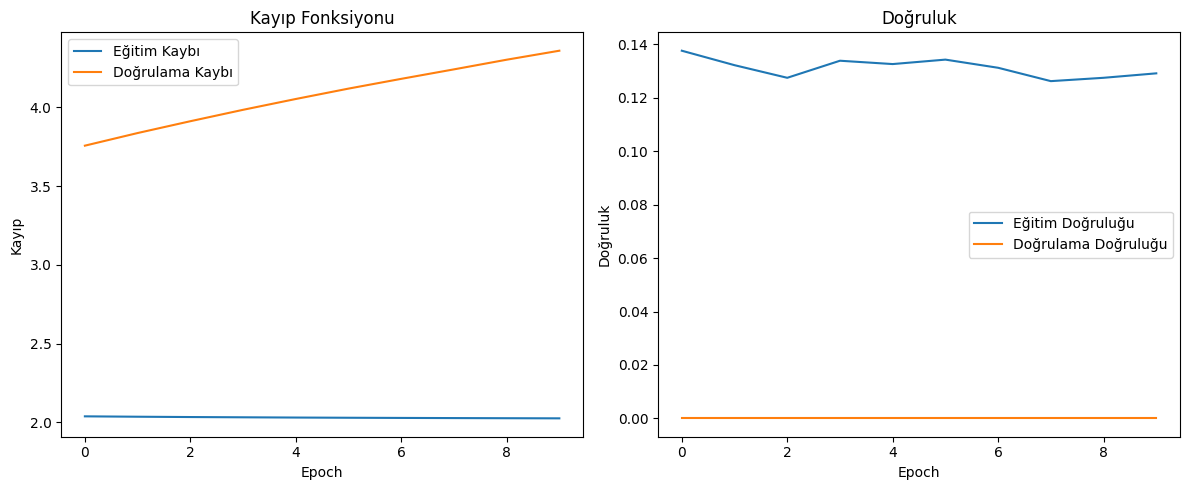

In [12]:
import matplotlib.pyplot as plt

# Modelin eğitim süreci
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Kayıp ve doğruluk grafiğini çizme
plt.figure(figsize=(12, 5))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Fonksiyonu')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.tight_layout()
plt.show()


Confusion Matrix ve Classification Report
Modelin test verisi üzerindeki performansını değerlendirmek için confusion matrix ve classification report oluşturacağız. Öncelikle test veri kümesine ait tahminleri alacağız.

57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 315ms/step


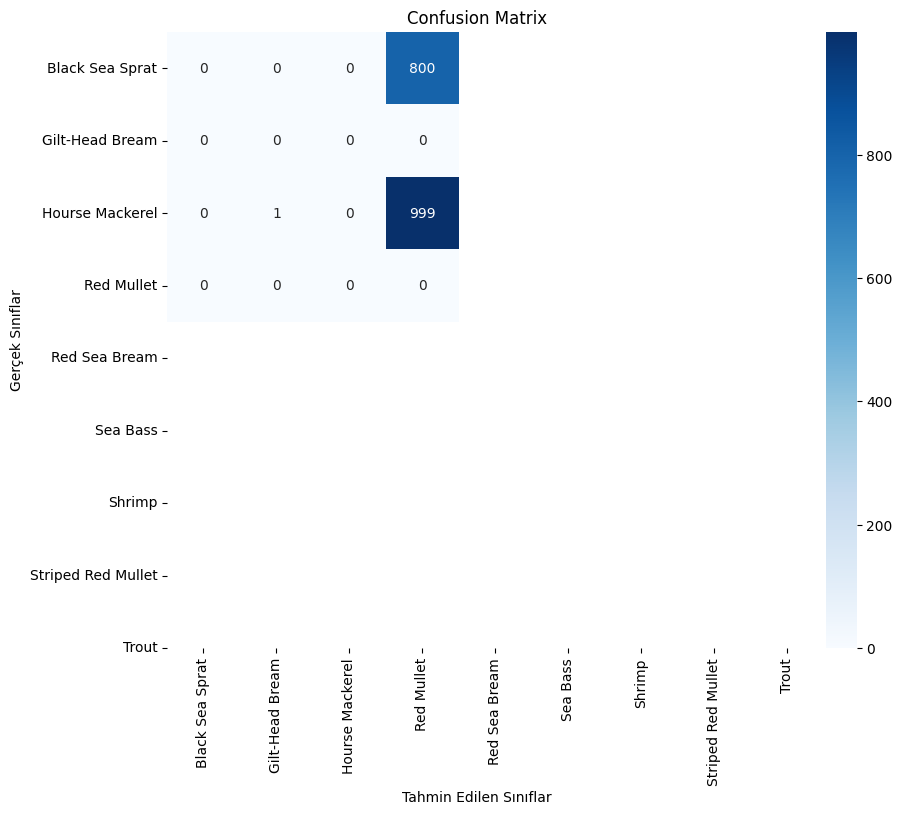

ValueError: Number of classes, 4, does not match size of target_names, 9. Try specifying the labels parameter

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Validation verilerinin tümünü kullanarak tahmin yap
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Gerçek sınıfları al
true_classes = validation_generator.classes[:len(predicted_classes)]  # Tahmin edilen örnek sayısına göre kırpma yapıyoruz
class_labels = list(validation_generator.class_indices.keys())  # Sınıf etiketleri

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Gerçek Sınıflar')
plt.xlabel('Tahmin Edilen Sınıflar')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


Hiper parametre optimizasyonu

In [ ]:
# Define a function to create the model with different hyperparameters
def create_model(optimizer='adam', dropout_rate=0.5, units=128):
    model = Sequential()
    model.add(Flatten(input_shape=(150, 150, 3)))
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(dataset['label'].unique()), activation='softmax'))
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a set of hyperparameters to try
optimizers = ['adam', 'sgd']
dropout_rates = [0.3, 0.5]
units_options = [64, 128]

# Train the model with each combination of hyperparameters
for optimizer in optimizers:
    for dropout_rate in dropout_rates:
        for units in units_options:
            print(f'Training with optimizer={optimizer}, dropout_rate={dropout_rate}, units={units}')
            model = create_model(optimizer=optimizer, dropout_rate=dropout_rate, units=units)
            history = model.fit(train_generator, validation_data=validation_generator, epochs=2)  # Change to more epochs if needed


Training with optimizer=adam, dropout_rate=0.3, units=64
Epoch 1/2
225/225 ━━━━━━━━━━━━━━━━━━━━ 99s 415ms/step - accuracy: 0.1580 - loss: 3.9428 - val_accuracy: 0.0000e+00 - val_loss: 2.4100
Epoch 2/2
225/225 ━━━━━━━━━━━━━━━━━━━━ 100s 436ms/step - accuracy: 0.1348 - loss: 2.1917 - val_accuracy: 0.0000e+00 - val_loss: 2.6185
Training with optimizer=adam, dropout_rate=0.3, units=128
Epoch 1/2
225/225 ━━━━━━━━━━━━━━━━━━━━ 101s 428ms/step - accuracy: 0.1392 - loss: 5.4874 - val_accuracy: 0.0000e+00 - val_loss: 2.4040
Epoch 2/2
225/225 ━━━━━━━━━━━━━━━━━━━━ 100s 434ms/step - accuracy: 0.1364 - loss: 2.1610 - val_accuracy: 0.0000e+00 - val_loss: 2.6066
Training with optimizer=adam, dropout_rate=0.5, units=64
Epoch 1/2
225/225 ━━━━━━━━━━━━━━━━━━━━ 103s 437ms/step - accuracy: 0.1349 - loss: 3.7778 - val_accuracy: 0.0000e+00 - val_loss: 2.4171
Epoch 2/2
225/225 ━━━━━━━━━━━━━━━━━━━━ 100s 433ms/step - accuracy: 0.1346 - loss: 2.1403 - val_accuracy: 0.0000e+00 - val_loss: 2.6243
Training with optim